In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download()

In [84]:
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',delimiter=',', encoding='ISO-8859-1')
df

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [86]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

# **Simplify the data**

In [91]:
df.columns=['sentiment','id','date','query','username','text']
df.shape

(1048572, 6)

# **Analysis**

In [92]:
df.sentiment.value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

# **Visualizing the count**

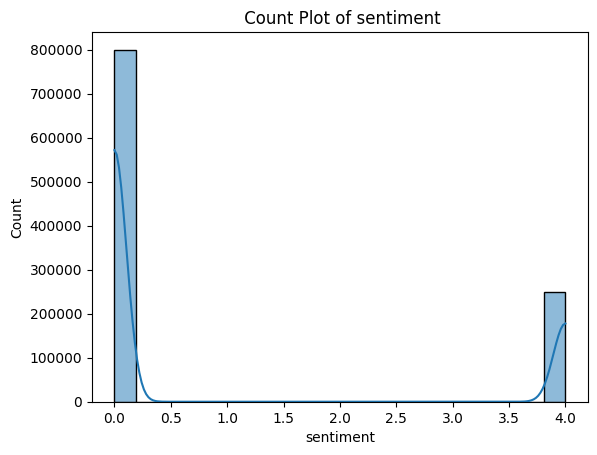

In [93]:
sns.histplot(df['sentiment'],kde=True)
plt.title(" Count Plot of sentiment")
plt.show()

In [ ]:
sns.countplot(df['sentiment'])
plt.title("Count Plot of Sentiment")
plt.show()

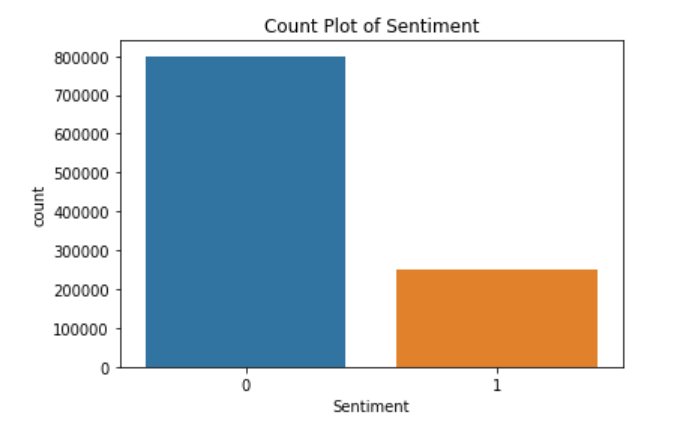

In [96]:
df['query'].value_counts()


NO_QUERY    1048572
Name: query, dtype: int64

# **Dropping unnecessary columns**

**Data Preprocessing**

1.**removing stop words**

2.**removing punctuations**

3.**Lemmatizing**

4.**removing tags**

5.**removing special characters**

6.**lowercase conversion**



In [100]:
data=df.drop(columns=['query','date'])
data

,sentiment,id,username,text
0,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...
1048567,4,1960186342,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


# **EDA**

In [107]:
text=df['text']
text_len = [len(t.split()) for t in text.values]
len_mean = np.mean(text_len)

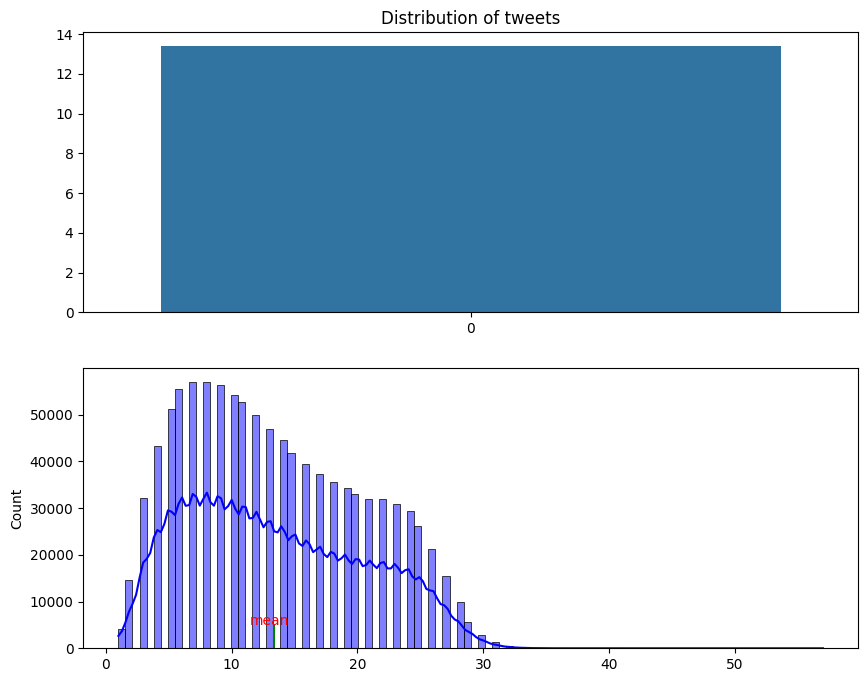

In [144]:
figure, axess = plt.subplots(2,1, figsize=(10, 8))
axess[0].set_title('Distribution of tweets')
sns.barplot(text_len, ax=axess[0])
sns.histplot(text_len,bins=100, kde=True, ax=axess[1],color='blue')
axess[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()

In [119]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [120]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: user 1min 51s, sys: 2.05 s, total: 1min 53s
Wall time: 1min 56s


# **Storing the cleaned data seperately**

In [121]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [125]:
data_cleaned['sentiment'].value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

In [124]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


# **Word cloud positive data**

In [127]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [128]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

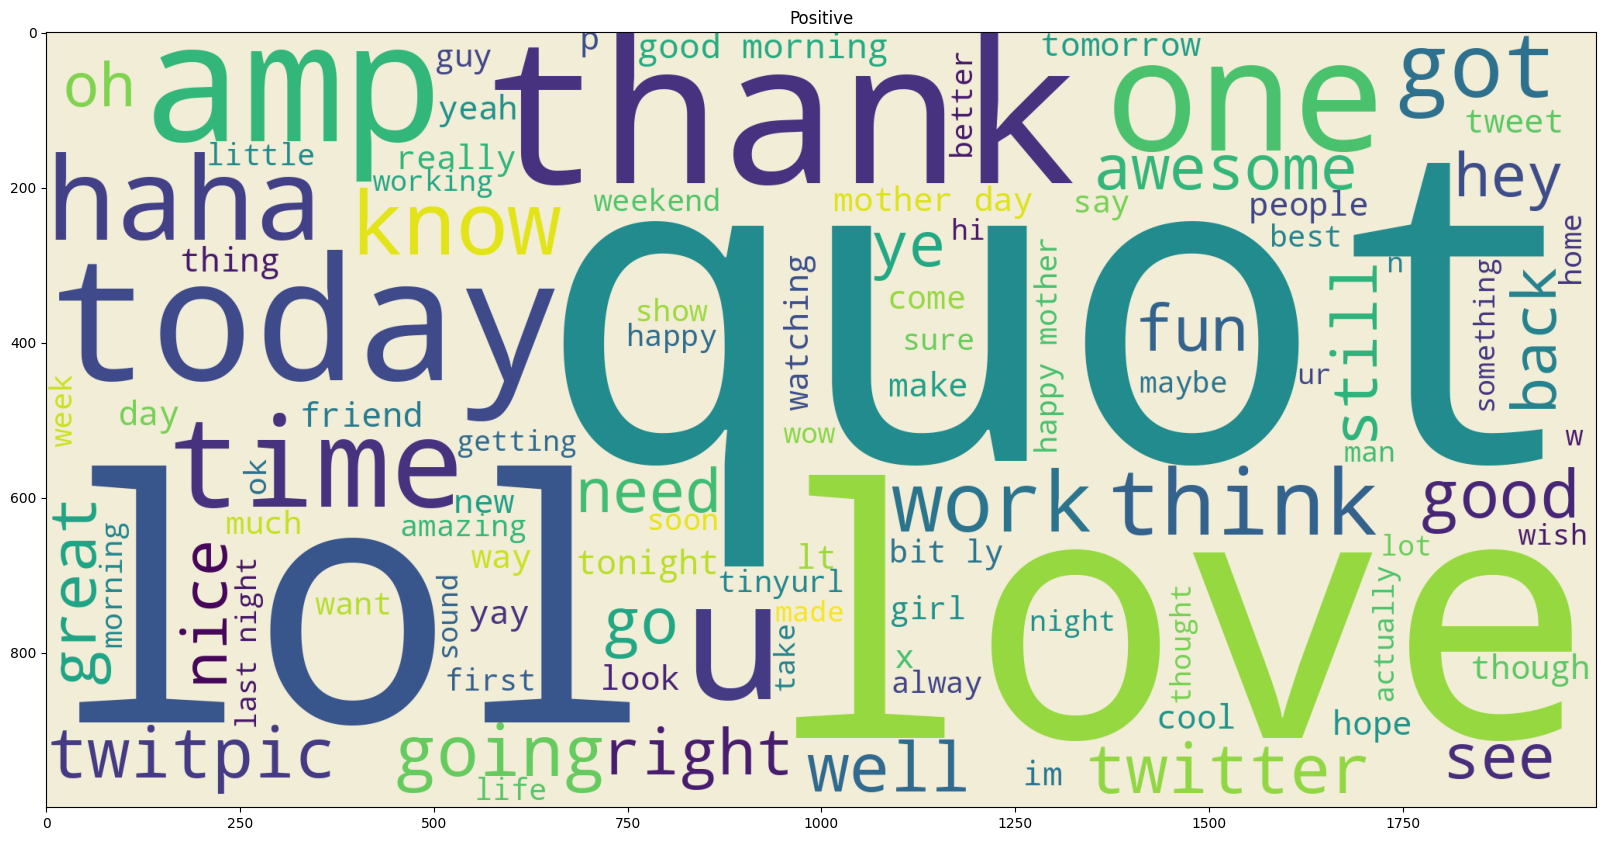

In [129]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

# **Word CLoud Negative data**

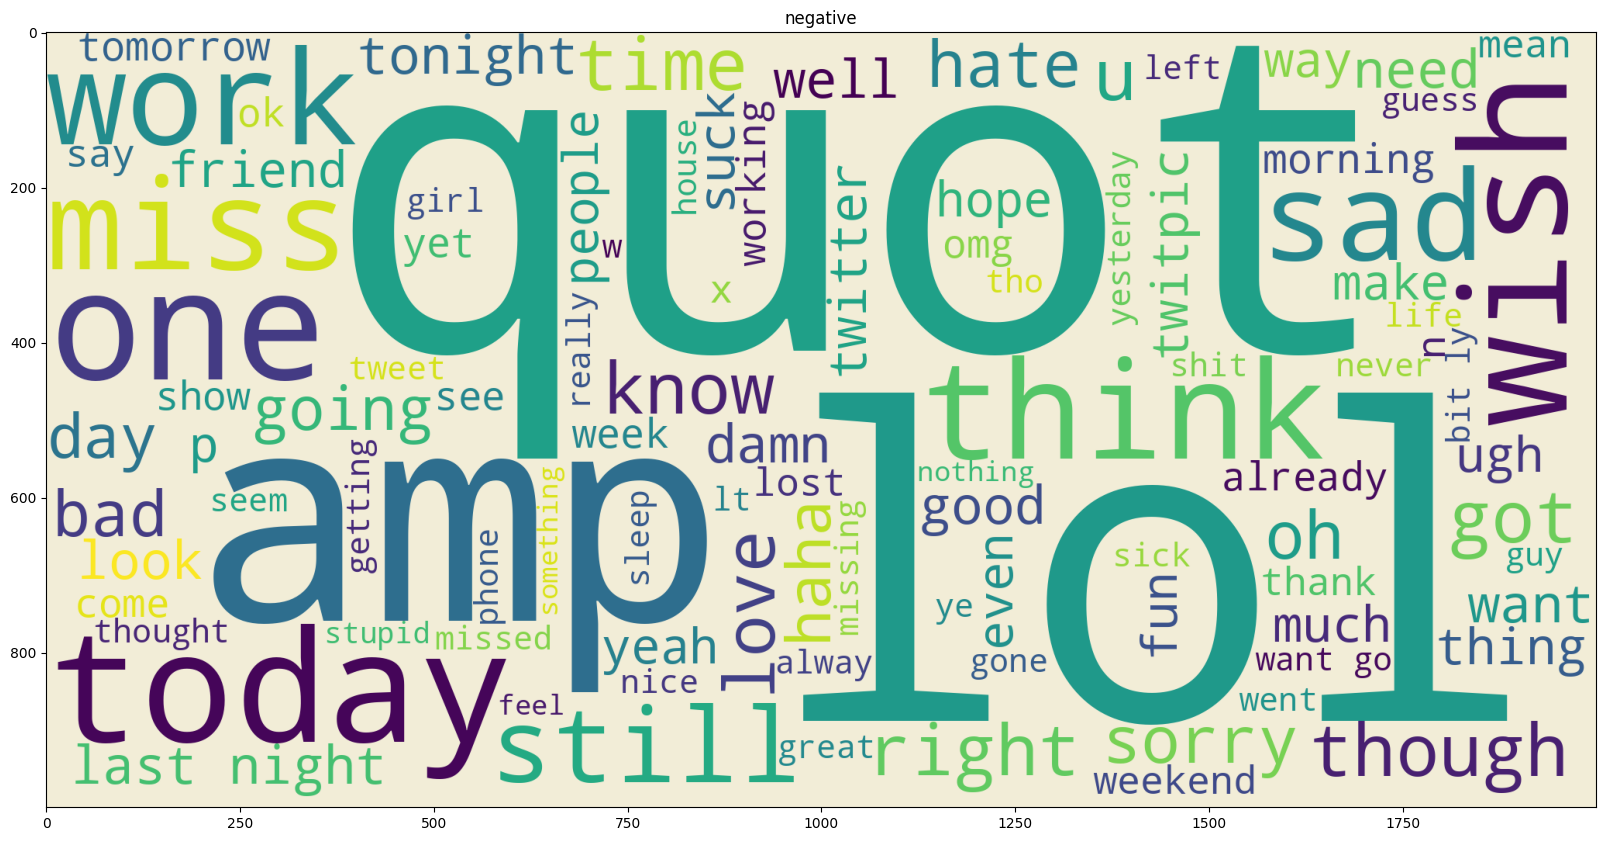

In [130]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

**Positive data has words like Thank, love , LOL, Haha ets**

**Negative data has words like work, sad, tired, suck sorry**

**Some of the words are still common in both such as Lol, quot**

# **One Word Count**

In [131]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)


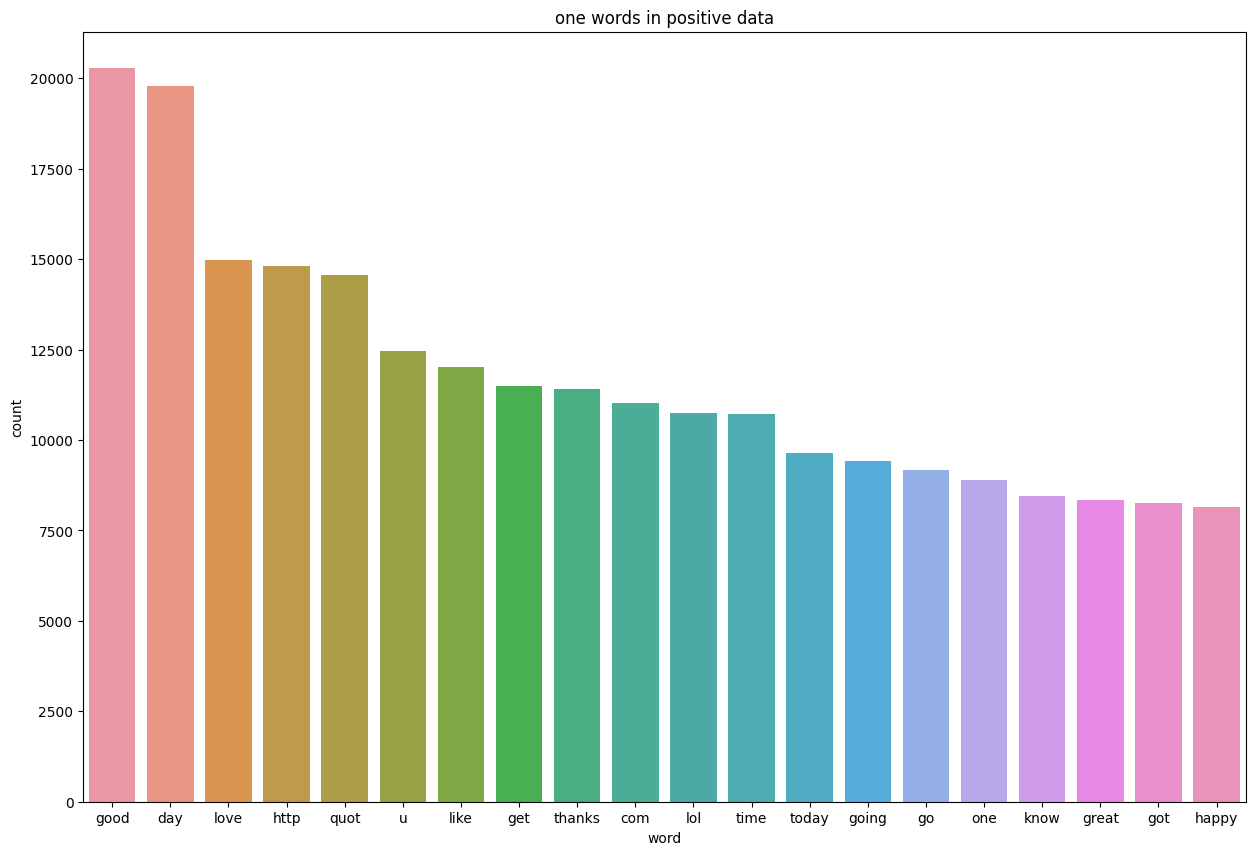

In [132]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

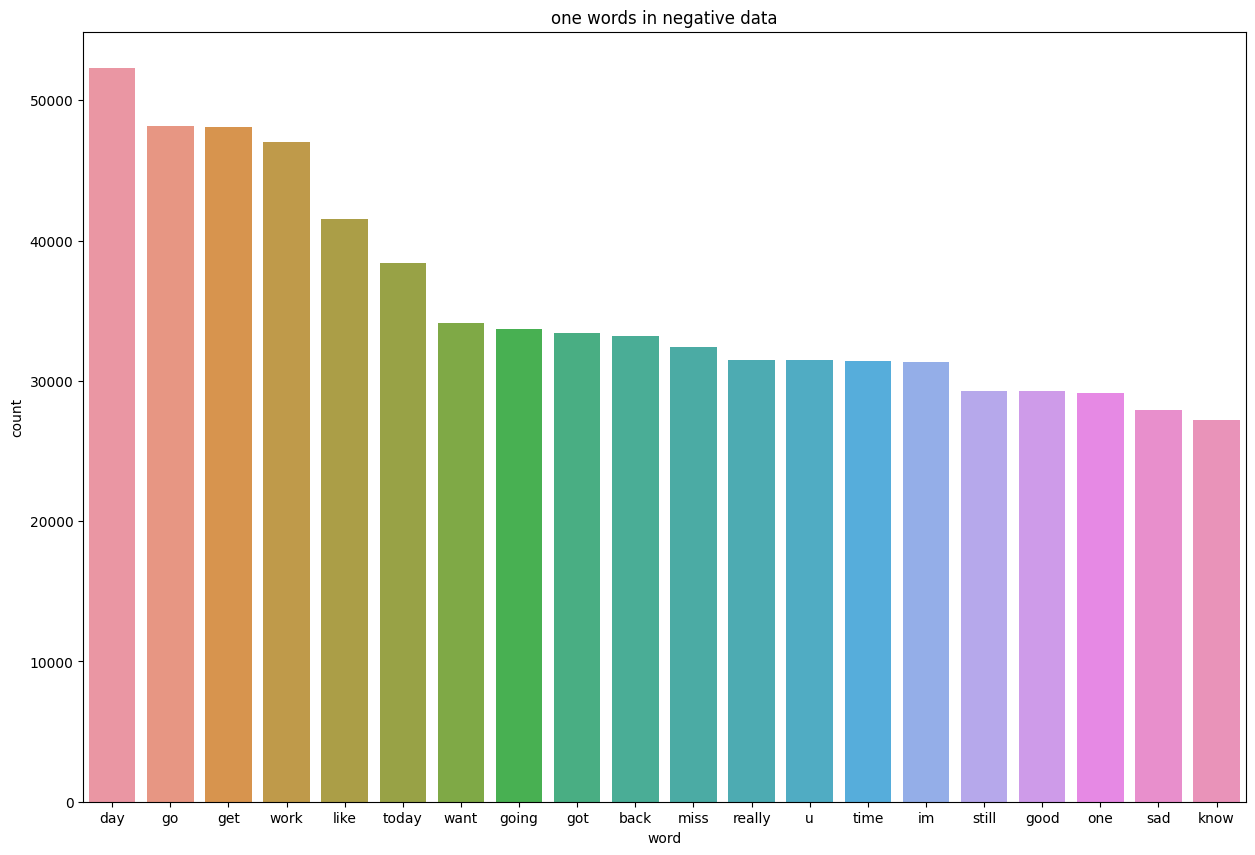

In [133]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

**Positive data has words like good, day, thanks, great, happy**

**Negative data has words like work, miss, sad etc**


# **Classification**

# **Naive bayes for sentiment analysis**

In [134]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)
import random

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 88.0
Testing Accuracy is: 81.0
Most Informative Features
                hotwords = True           Positi : Negati =     52.4 : 1.0
                  farrah = True           Negati : Positi =     35.7 : 1.0
                   boooo = True           Negati : Positi =     34.2 : 1.0
                 rmilana = True           Positi : Negati =     26.7 : 1.0
                   atcha = True           Positi : Negati =     24.6 : 1.0
            followfriday = True           Positi : Negati =     22.6 : 1.0
                     sob = True           Negati : Positi =     22.6 : 1.0
                   catep = True           Positi : Negati =     22.4 : 1.0
              delongeday = True           Positi : Negati =     22.4 : 1.0
                jaljeera = True           Positi : Negati =     22.4 : 1.0
None


# **TFIDF for sentiment analysis**

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

# **LogisticRegression**

training accuracy =  86.0
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    535997
           4       0.80      0.54      0.64    166546

    accuracy                           0.86    702543
   macro avg       0.83      0.75      0.78    702543
weighted avg       0.85      0.86      0.85    702543



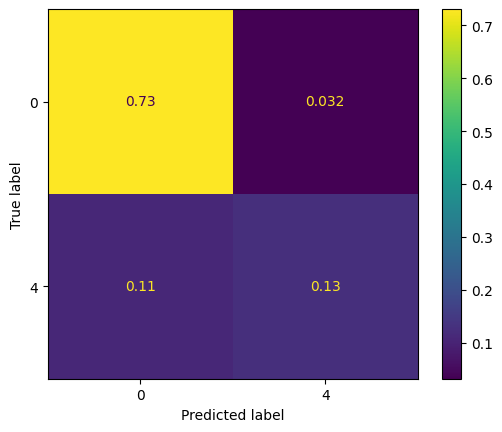

testing accuracy =  83.0
              precision    recall  f1-score   support

           0       0.85      0.94      0.90    263999
           4       0.73      0.48      0.58     82030

    accuracy                           0.83    346029
   macro avg       0.79      0.71      0.74    346029
weighted avg       0.82      0.83      0.82    346029



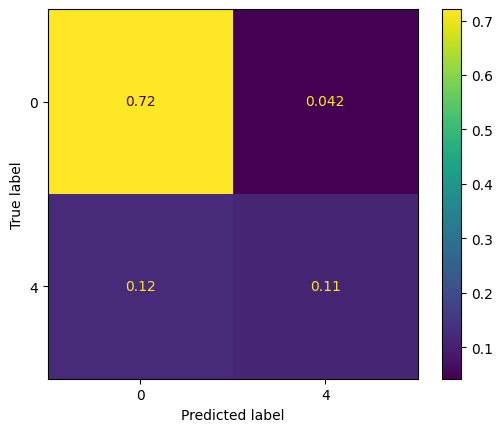

In [143]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train,y_train)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

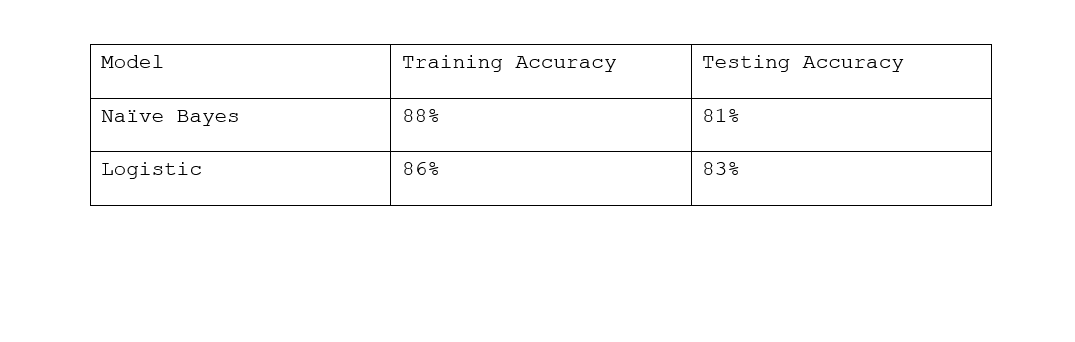We see that Logistic regression model performs best with least overfitting as compared to other models and has better performance in testing dataset as well.

